### Import the required libraries and modules that you would need.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Read that data into Python and call the dataframe churnData.
### Check the datatypes of all the columns in the data.


In [2]:
#Read that data into Python and call the dataframe churnData.
data = "DATA_Customer-Churn.csv"
churnData = pd.read_csv(data)
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [4]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

### Check for null values in the dataframe. Replace the null values.


In [5]:
def null_check(df):
    print(f'Total null values per row: \n{df.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{df.isnull().sum()}\n')
    
null_check(churnData)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Length: 7043, dtype: int64

Total null values per column: 
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [6]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(0)

In [7]:
churnData['Churn'] = churnData['Churn'].map({'No': 0, 'Yes': 1})

In [8]:
y = churnData[['Churn']]

In [9]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


In [12]:
y_test.head(3)

,Churn
6625,1
5975,1
6891,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [14]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([[<Axes: title={'center': 'Churn'}>]], dtype=object)

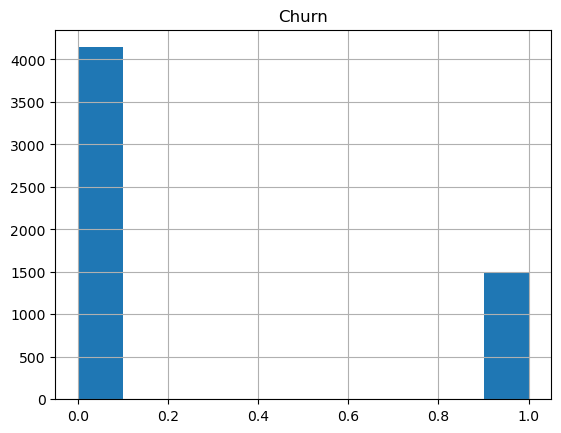

In [15]:
y_train.hist()

In [16]:
X_test_scaled

array([[-0.82973027,  2.28893046,  0.87804919, -0.52307211],
       [-1.0334653 , -0.43688527,  0.82662876, -0.73703234],
       [-1.15570633, -0.43688527, -1.18706168, -0.94812919],
       ...,
       [ 0.71865598, -0.43688527,  1.2794603 ,  1.3015148 ],
       [-0.13703116, -0.43688527,  0.82331131,  0.15054799],
       [ 1.12612605,  2.28893046,  0.81667642,  1.32715303]])

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



log_model = LogisticRegression() 

X_train_log = scaler.transform(X_train)
X_test_log = scaler.transform(X_test)

#where the magic happens

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.788605,0.802697
1,Precision,0.645631,0.695312
2,Recall,0.446009,0.470899


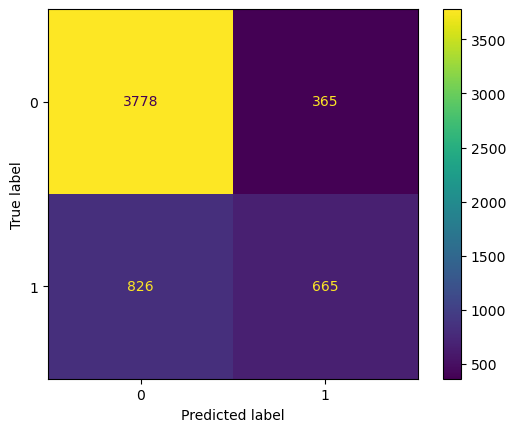

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

In [20]:
X_test

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
6625,12,1,91.30,1094.50
5975,7,0,89.75,608.80
6891,4,0,29.05,129.60
1681,72,0,25.00,1849.20
4780,9,0,70.05,657.50
...,...,...,...,...
6525,55,0,20.50,1177.95
710,1,0,19.55,19.55
6639,50,0,103.40,5236.40
6844,29,0,89.65,2623.65


In [27]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.834398,0.770050
1,Precision,0.746032,0.603053
2,Recall,0.567404,0.417989


In [28]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

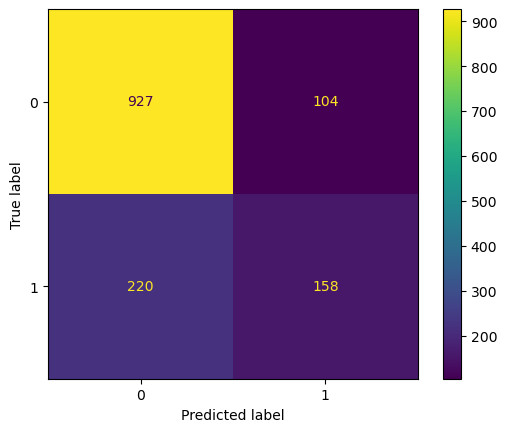

In [29]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()